# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile
from sklearn.preprocessing import LabelBinarizer

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


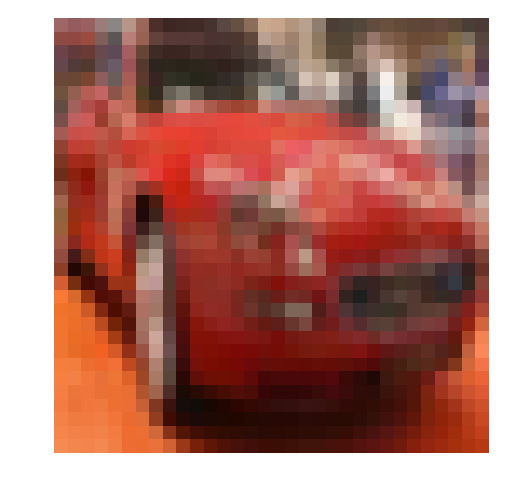

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np
from sklearn import preprocessing

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return (x-np.min(x))/(np.max(x)-np.min(x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
import pandas
encoder = LabelBinarizer()
encoder.fit(range(10))
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # Create the encoder 创建编码器
    
    #print("x",x)
    
    output = encoder.transform(x)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper


# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    #x, y, z = image_shape
    return tf.placeholder(tf.float32, shape = (None, image_shape[0], image_shape[1], image_shape[2]), name = "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape = (None, n_classes), name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape = None, name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
import problem_unittests as tests

In [9]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, max_pool_padding = "SAME"):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function

    #W = tf.get_variable("W", [a, b, z, conv_num_outputs], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W = tf.Variable(tf.truncated_normal([int(conv_ksize[0]), int(conv_ksize[1]), int(x_tensor.shape[3]), int(conv_num_outputs)], stddev = 0.05))
    #b = tf.get_variable("b", [4, 4, 3, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    b = tf.Variable(tf.zeros(conv_num_outputs))
    Z = tf.nn.conv2d(x_tensor, W, strides = [1, conv_strides[0], conv_strides[1], 1], padding = "SAME")
    A = tf.nn.relu(tf.nn.bias_add(Z, b))
    P1 = tf.nn.max_pool(A, ksize = [1, pool_ksize[0], pool_ksize[1], 1], strides = [1, pool_strides[0], pool_strides[1], 1], padding = max_pool_padding)
    return P1

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [11]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn = tf.nn.relu)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [12]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn = None)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [13]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    Z1 = conv2d_maxpool(x, 48, (5,5), (1,1), (3,3), (3,3), max_pool_padding = "SAME")
    Z2 = conv2d_maxpool(Z1, 128, (3,3), (1,1), (2,2), (2,2), max_pool_padding = "SAME")
    Z2 = tf.nn.dropout(Z2, keep_prob)
    Z3 = conv2d_maxpool(Z2, 192, (3,3), (1,1), (2,2), (2,2), max_pool_padding = "VALID")
    Z4 = conv2d_maxpool(Z3, 192, (3,3), (1,1), (2,2), (2,2), max_pool_padding = "SAME")
    Z4 = tf.nn.dropout(Z4, keep_prob)
    Z5 = conv2d_maxpool(Z4, 128, (3,3), (1,1), (2,2), (2,2), max_pool_padding = "VALID")
    A5 = tf.nn.dropout(Z5, keep_prob)
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    A5 = flatten(A5)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    Z6 = fully_conn(A5, 256)
    A6 = tf.nn.dropout(Z6, keep_prob)
    Z7 = fully_conn(A6, 128)
    A7 = tf.nn.dropout(Z7, keep_prob)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    A8 = output(A7, 10)
    
    # TODO: return output
    return A8


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [14]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    
    #label_batch.dtype = "int"
    #print(label_batch[0:2])
    # TODO: Implement Function
    #X_train = normalize(feature_batch)
    #print("X_train.shape = "+str(X_train.shape))
    #label = label_batch*10
    #label_batch = label_batch.astype(int)
    #print ("label_batch="+str(label_batch.shape))
    #y_train = one_hot_encode(label_batch)
    #y_train = label_batch
    
    
    #x_tensor = neural_net_image_input((X_train.shape[1], X_train.shape[2], X_train.shape[3]))
    
    #print ("y_train.shape="+str(y_train.shape))
    
    #y_tensor = neural_net_label_input(y_train.shape[1])
    #print("x_tensor.shape = "+str(x_tensor.shape))
    #print("y_tensor.shape = "+str(y_tensor.shape))
    #print("label_batch.shape = "+str(label_batch.shape))
    #print("feature_batch.shape = "+str(feature_batch.shape))
    #keep_prob = neural_net_keep_prob_input()
    
    #logits = conv_net(x_tensor, keep_prob)
    
    #logits = tf.identity(logits, name='logits')
    
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_train))
    
    #correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    
    #accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    #init = tf.global_variables_initializer()
    #with tf.Session() as sess:
        
        # Run the initialization
        #sess.run(init)
    
    temp_cost = session.run([optimizer, cost], feed_dict = {x: feature_batch, y: label_batch, keep_prob: keep_probability})
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [15]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    #Z = conv_net(feature_batch, 1)
    #y_pred = tf.nn.softmax(Z)
    #predict_op = tf.argmax(y_pred, 1)
    #correct_prediction = tf.equal(predict_op, tf.argmax(label_batch, 1))
        
    # Calculate accuracy on the test set
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    #accuracy = accuracy.eval({X: X_test, Y: Y_test})
    
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    train_acc = sess.run(accuracy, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: 1.})
    valid_acc = sess.run(accuracy, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})
    print('Loss: {:>10.4f} train Accuracy: {:.6f} Validation Accuracy: {:.6f} '.format(
                loss, train_acc, valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [16]:
# TODO: Tune Parameters
epochs = 128
batch_size = 256
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            #print("batch_features:"+str(batch_features))
            #print("batch_labels:"+str(batch_labels))
            train_neural_network(sess, optimizer, keep_probability, batch_features/1.0, batch_labels/1.0)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.3007 train Accuracy: 0.125000 Validation Accuracy: 0.105000 
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.2626 train Accuracy: 0.125000 Validation Accuracy: 0.174200 
Epoch  3, CIFAR-10 Batch 1:  Loss:     2.2218 train Accuracy: 0.200000 Validation Accuracy: 0.175600 
Epoch  4, CIFAR-10 Batch 1:  Loss:     2.1826 train Accuracy: 0.150000 Validation Accuracy: 0.185400 
Epoch  5, CIFAR-10 Batch 1:  Loss:     2.1410 train Accuracy: 0.150000 Validation Accuracy: 0.181600 
Epoch  6, CIFAR-10 Batch 1:  Loss:     2.0947 train Accuracy: 0.175000 Validation Accuracy: 0.224000 
Epoch  7, CIFAR-10 Batch 1:  Loss:     2.0944 train Accuracy: 0.175000 Validation Accuracy: 0.203200 
Epoch  8, CIFAR-10 Batch 1:  Loss:     1.9614 train Accuracy: 0.200000 Validation Accuracy: 0.273000 
Epoch  9, CIFAR-10 Batch 1:  Loss:     1.9783 train Accuracy: 0.225000 Validation Accuracy: 0.288600 
Epoch 10, CIFAR-10 Batch 1:  Loss:     

Epoch 81, CIFAR-10 Batch 1:  Loss:     0.0779 train Accuracy: 1.000000 Validation Accuracy: 0.649200 
Epoch 82, CIFAR-10 Batch 1:  Loss:     0.0884 train Accuracy: 0.975000 Validation Accuracy: 0.647600 
Epoch 83, CIFAR-10 Batch 1:  Loss:     0.0937 train Accuracy: 0.950000 Validation Accuracy: 0.634800 
Epoch 84, CIFAR-10 Batch 1:  Loss:     0.0664 train Accuracy: 1.000000 Validation Accuracy: 0.657600 
Epoch 85, CIFAR-10 Batch 1:  Loss:     0.0819 train Accuracy: 0.975000 Validation Accuracy: 0.656000 
Epoch 86, CIFAR-10 Batch 1:  Loss:     0.0849 train Accuracy: 0.975000 Validation Accuracy: 0.645000 
Epoch 87, CIFAR-10 Batch 1:  Loss:     0.0749 train Accuracy: 1.000000 Validation Accuracy: 0.656200 
Epoch 88, CIFAR-10 Batch 1:  Loss:     0.0620 train Accuracy: 1.000000 Validation Accuracy: 0.661200 
Epoch 89, CIFAR-10 Batch 1:  Loss:     0.0668 train Accuracy: 0.975000 Validation Accuracy: 0.655200 
Epoch 90, CIFAR-10 Batch 1:  Loss:     0.0635 train Accuracy: 1.000000 Validation 

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                #print("batch_features:"+str(batch_features.shape))
                #print("batch_labels:"+str(batch_labels))
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.2984 train Accuracy: 0.100000 Validation Accuracy: 0.110000 
Epoch  1, CIFAR-10 Batch 2:  Loss:     2.2764 train Accuracy: 0.175000 Validation Accuracy: 0.181000 
Epoch  1, CIFAR-10 Batch 3:  Loss:     2.1808 train Accuracy: 0.175000 Validation Accuracy: 0.158400 
Epoch  1, CIFAR-10 Batch 4:  Loss:     2.0869 train Accuracy: 0.150000 Validation Accuracy: 0.187600 
Epoch  1, CIFAR-10 Batch 5:  Loss:     1.9723 train Accuracy: 0.300000 Validation Accuracy: 0.194000 
Epoch  2, CIFAR-10 Batch 1:  Loss:     2.1898 train Accuracy: 0.225000 Validation Accuracy: 0.210400 
Epoch  2, CIFAR-10 Batch 2:  Loss:     1.9229 train Accuracy: 0.325000 Validation Accuracy: 0.183000 
Epoch  2, CIFAR-10 Batch 3:  Loss:     1.7700 train Accuracy: 0.350000 Validation Accuracy: 0.218200 
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.8505 train Accuracy: 0.250000 Validation Accuracy: 0.246600 
Epoch  2, CIFAR-10 Batch 5:  Loss:     1.9168 train Accuracy: 0.275000

Epoch 17, CIFAR-10 Batch 1:  Loss:     0.5520 train Accuracy: 0.800000 Validation Accuracy: 0.693400 
Epoch 17, CIFAR-10 Batch 2:  Loss:     0.6171 train Accuracy: 0.775000 Validation Accuracy: 0.702200 
Epoch 17, CIFAR-10 Batch 3:  Loss:     0.4362 train Accuracy: 0.875000 Validation Accuracy: 0.709400 
Epoch 17, CIFAR-10 Batch 4:  Loss:     0.4932 train Accuracy: 0.825000 Validation Accuracy: 0.707400 
Epoch 17, CIFAR-10 Batch 5:  Loss:     0.4947 train Accuracy: 0.825000 Validation Accuracy: 0.703400 
Epoch 18, CIFAR-10 Batch 1:  Loss:     0.5662 train Accuracy: 0.800000 Validation Accuracy: 0.688600 
Epoch 18, CIFAR-10 Batch 2:  Loss:     0.5482 train Accuracy: 0.800000 Validation Accuracy: 0.665800 
Epoch 18, CIFAR-10 Batch 3:  Loss:     0.4288 train Accuracy: 0.875000 Validation Accuracy: 0.694000 
Epoch 18, CIFAR-10 Batch 4:  Loss:     0.5216 train Accuracy: 0.900000 Validation Accuracy: 0.696400 
Epoch 18, CIFAR-10 Batch 5:  Loss:     0.4929 train Accuracy: 0.925000 Validation 

Epoch 33, CIFAR-10 Batch 2:  Loss:     0.2649 train Accuracy: 0.900000 Validation Accuracy: 0.751800 
Epoch 33, CIFAR-10 Batch 3:  Loss:     0.1795 train Accuracy: 0.975000 Validation Accuracy: 0.755400 
Epoch 33, CIFAR-10 Batch 4:  Loss:     0.2092 train Accuracy: 0.975000 Validation Accuracy: 0.753600 
Epoch 33, CIFAR-10 Batch 5:  Loss:     0.1863 train Accuracy: 1.000000 Validation Accuracy: 0.750200 
Epoch 34, CIFAR-10 Batch 1:  Loss:     0.2381 train Accuracy: 0.950000 Validation Accuracy: 0.746200 
Epoch 34, CIFAR-10 Batch 2:  Loss:     0.2395 train Accuracy: 0.950000 Validation Accuracy: 0.749200 
Epoch 34, CIFAR-10 Batch 3:  Loss:     0.1979 train Accuracy: 0.950000 Validation Accuracy: 0.762400 
Epoch 34, CIFAR-10 Batch 4:  Loss:     0.2200 train Accuracy: 0.975000 Validation Accuracy: 0.750400 
Epoch 34, CIFAR-10 Batch 5:  Loss:     0.1576 train Accuracy: 1.000000 Validation Accuracy: 0.752200 
Epoch 35, CIFAR-10 Batch 1:  Loss:     0.2574 train Accuracy: 0.925000 Validation 

Epoch 49, CIFAR-10 Batch 3:  Loss:     0.1446 train Accuracy: 0.975000 Validation Accuracy: 0.778000 
Epoch 49, CIFAR-10 Batch 4:  Loss:     0.1209 train Accuracy: 0.975000 Validation Accuracy: 0.771600 
Epoch 49, CIFAR-10 Batch 5:  Loss:     0.1010 train Accuracy: 1.000000 Validation Accuracy: 0.771600 
Epoch 50, CIFAR-10 Batch 1:  Loss:     0.1398 train Accuracy: 1.000000 Validation Accuracy: 0.773800 
Epoch 50, CIFAR-10 Batch 2:  Loss:     0.1501 train Accuracy: 0.975000 Validation Accuracy: 0.779600 
Epoch 50, CIFAR-10 Batch 3:  Loss:     0.1039 train Accuracy: 1.000000 Validation Accuracy: 0.763600 
Epoch 50, CIFAR-10 Batch 4:  Loss:     0.1232 train Accuracy: 0.975000 Validation Accuracy: 0.767800 
Epoch 50, CIFAR-10 Batch 5:  Loss:     0.0884 train Accuracy: 1.000000 Validation Accuracy: 0.773800 
Epoch 51, CIFAR-10 Batch 1:  Loss:     0.1138 train Accuracy: 1.000000 Validation Accuracy: 0.774000 
Epoch 51, CIFAR-10 Batch 2:  Loss:     0.1545 train Accuracy: 1.000000 Validation 

Epoch 65, CIFAR-10 Batch 4:  Loss:     0.0633 train Accuracy: 1.000000 Validation Accuracy: 0.790000 
Epoch 65, CIFAR-10 Batch 5:  Loss:     0.0468 train Accuracy: 1.000000 Validation Accuracy: 0.787200 
Epoch 66, CIFAR-10 Batch 1:  Loss:     0.0831 train Accuracy: 1.000000 Validation Accuracy: 0.778800 
Epoch 66, CIFAR-10 Batch 2:  Loss:     0.1143 train Accuracy: 1.000000 Validation Accuracy: 0.782600 
Epoch 66, CIFAR-10 Batch 3:  Loss:     0.0504 train Accuracy: 1.000000 Validation Accuracy: 0.779800 
Epoch 66, CIFAR-10 Batch 4:  Loss:     0.0716 train Accuracy: 1.000000 Validation Accuracy: 0.777600 
Epoch 66, CIFAR-10 Batch 5:  Loss:     0.0592 train Accuracy: 1.000000 Validation Accuracy: 0.784000 
Epoch 67, CIFAR-10 Batch 1:  Loss:     0.1528 train Accuracy: 0.950000 Validation Accuracy: 0.776400 
Epoch 67, CIFAR-10 Batch 2:  Loss:     0.1051 train Accuracy: 1.000000 Validation Accuracy: 0.789800 
Epoch 67, CIFAR-10 Batch 3:  Loss:     0.0773 train Accuracy: 1.000000 Validation 

Epoch 81, CIFAR-10 Batch 5:  Loss:     0.0455 train Accuracy: 1.000000 Validation Accuracy: 0.788000 
Epoch 82, CIFAR-10 Batch 1:  Loss:     0.0525 train Accuracy: 1.000000 Validation Accuracy: 0.788800 
Epoch 82, CIFAR-10 Batch 2:  Loss:     0.0501 train Accuracy: 1.000000 Validation Accuracy: 0.795000 
Epoch 82, CIFAR-10 Batch 3:  Loss:     0.0346 train Accuracy: 1.000000 Validation Accuracy: 0.788200 
Epoch 82, CIFAR-10 Batch 4:  Loss:     0.0474 train Accuracy: 1.000000 Validation Accuracy: 0.787600 
Epoch 82, CIFAR-10 Batch 5:  Loss:     0.0410 train Accuracy: 1.000000 Validation Accuracy: 0.795000 
Epoch 83, CIFAR-10 Batch 1:  Loss:     0.0509 train Accuracy: 1.000000 Validation Accuracy: 0.795600 
Epoch 83, CIFAR-10 Batch 2:  Loss:     0.0594 train Accuracy: 1.000000 Validation Accuracy: 0.793000 
Epoch 83, CIFAR-10 Batch 3:  Loss:     0.0444 train Accuracy: 1.000000 Validation Accuracy: 0.783200 
Epoch 83, CIFAR-10 Batch 4:  Loss:     0.0526 train Accuracy: 1.000000 Validation 

Epoch 98, CIFAR-10 Batch 1:  Loss:     0.0431 train Accuracy: 1.000000 Validation Accuracy: 0.795400 
Epoch 98, CIFAR-10 Batch 2:  Loss:     0.0364 train Accuracy: 1.000000 Validation Accuracy: 0.783200 
Epoch 98, CIFAR-10 Batch 3:  Loss:     0.0230 train Accuracy: 1.000000 Validation Accuracy: 0.797800 
Epoch 98, CIFAR-10 Batch 4:  Loss:     0.0391 train Accuracy: 1.000000 Validation Accuracy: 0.785000 
Epoch 98, CIFAR-10 Batch 5:  Loss:     0.0316 train Accuracy: 1.000000 Validation Accuracy: 0.794000 
Epoch 99, CIFAR-10 Batch 1:  Loss:     0.0560 train Accuracy: 1.000000 Validation Accuracy: 0.796400 
Epoch 99, CIFAR-10 Batch 2:  Loss:     0.0260 train Accuracy: 1.000000 Validation Accuracy: 0.799200 
Epoch 99, CIFAR-10 Batch 3:  Loss:     0.0240 train Accuracy: 1.000000 Validation Accuracy: 0.795200 
Epoch 99, CIFAR-10 Batch 4:  Loss:     0.0322 train Accuracy: 1.000000 Validation Accuracy: 0.804600 
Epoch 99, CIFAR-10 Batch 5:  Loss:     0.0225 train Accuracy: 1.000000 Validation 

Epoch 114, CIFAR-10 Batch 1:  Loss:     0.0247 train Accuracy: 1.000000 Validation Accuracy: 0.802600 
Epoch 114, CIFAR-10 Batch 2:  Loss:     0.0281 train Accuracy: 1.000000 Validation Accuracy: 0.791400 
Epoch 114, CIFAR-10 Batch 3:  Loss:     0.0243 train Accuracy: 1.000000 Validation Accuracy: 0.797800 
Epoch 114, CIFAR-10 Batch 4:  Loss:     0.0317 train Accuracy: 1.000000 Validation Accuracy: 0.798800 
Epoch 114, CIFAR-10 Batch 5:  Loss:     0.0149 train Accuracy: 1.000000 Validation Accuracy: 0.792800 
Epoch 115, CIFAR-10 Batch 1:  Loss:     0.0266 train Accuracy: 1.000000 Validation Accuracy: 0.799600 
Epoch 115, CIFAR-10 Batch 2:  Loss:     0.0226 train Accuracy: 1.000000 Validation Accuracy: 0.799200 
Epoch 115, CIFAR-10 Batch 3:  Loss:     0.0252 train Accuracy: 1.000000 Validation Accuracy: 0.802400 
Epoch 115, CIFAR-10 Batch 4:  Loss:     0.0254 train Accuracy: 1.000000 Validation Accuracy: 0.790400 
Epoch 115, CIFAR-10 Batch 5:  Loss:     0.0184 train Accuracy: 1.000000 V

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7875



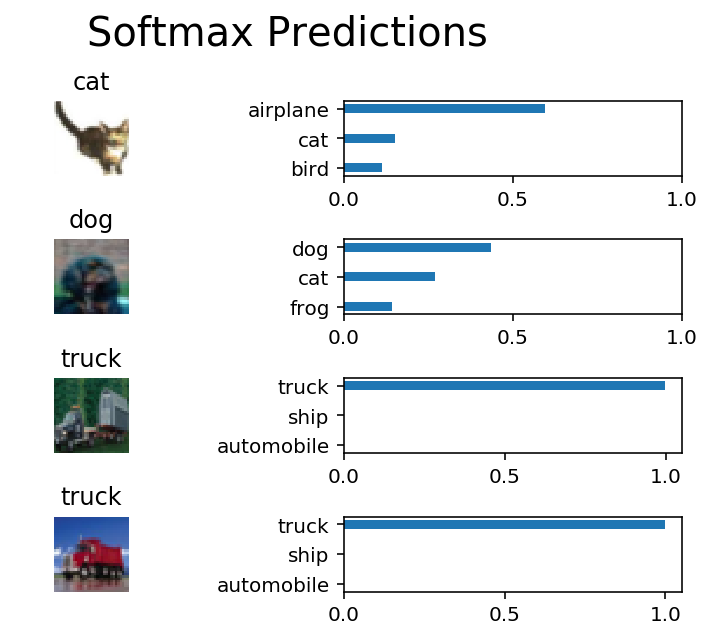

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.